### Understanding rotation of image

The aim of this notebook is to understand matrix rotation.

#### imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

> A typical image is of 24 bit. For an RGB, HSV, etc. color space each individual channel uses 8 bit to store color, intensity, luminance, etc. information depending on the choice of color space. Since 8 bits are used that's why we have 256 combinations. 
> A typical pixel in RGB is represented as (120, 255, 34). 

#### How image rotation works? Will love it!

Given an image in `RGB` color space. Let's take a pixel and assign it's `x and y` coordinates relative to an `origin`. Store the pixel value. Apply the rotation(transformation) and write the pixel value in place of `x and y`. We end up wit a rotated image. 

For more insight go through [this blog](http://datagenetics.com/blog/august32013/index.html).

In [2]:
img1 = cv2.imread('images/clock.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('images/pill_01.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

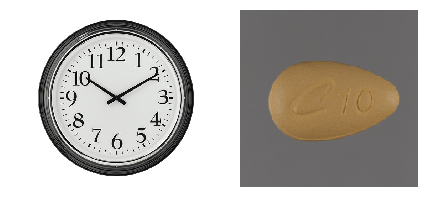

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,7))

ax[0].imshow(img1);
ax[0].grid(False);
ax[0].axis('off');
ax[1].imshow(img2);
ax[1].grid(False);
ax[1].axis('off');

### Rotating the images with an issue!

![alt](images/clock.gif)

> A cirular image is rotated about the center. Due to this very shape we can manage. But what if a non-circular shape is rotated.

##### Issues lies when the image is not circular. Here's an example of trying to rotate an oblong object.

![altagain](images/pill_wrong.gif)

> The image is rotating right but it's cut off at places. The image boundary is not taken into account. Thus is needed to be accounted for using some translation.

In [6]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

#### Image rotation corrected :D

![altthird](images/pill_right.gif)